In [1]:
import sys
sys.path.insert(0, "..")
sys.path.insert(0, "../../torchdriveenv")

In [2]:
import pickle
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torch.utils.data import DataLoader

from edm.datasets import TorchDriveEnvEpisodeDataset

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [4]:
data_dir = "../datasets/itra_single"

In [5]:
episode_data_path = f"{data_dir}/episode_data"

In [6]:
dataset = TorchDriveEnvEpisodeDataset(data_dir=episode_data_path, diffusion_keys=["action"], condition_keys=["obs_birdview"])

/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/kezhang/work/stochastic-critic/.venv/lib/python3.10/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `tor

In [7]:
dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

In [8]:
recurrent_state, obs = next(iter(dataloader))

In [9]:
len(obs)

100

In [10]:
obs[0].shape

torch.Size([3, 64, 64])

In [11]:
converted_images = [Image.fromarray(img.numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB') for img in obs]

In [12]:
obs_data_path = f"{data_dir}/obs_data"

for i, image in enumerate(converted_images):
    image.save(f'{obs_data_path}/{i}.png')

In [13]:
for i, bv in enumerate(obs):
    with open(f'{obs_data_path}/{i}.pkl', "wb") as f:
        pickle.dump(bv, f)

In [14]:
recurrent_state, obs = next(iter(dataloader))

In [15]:
# recurrent_state

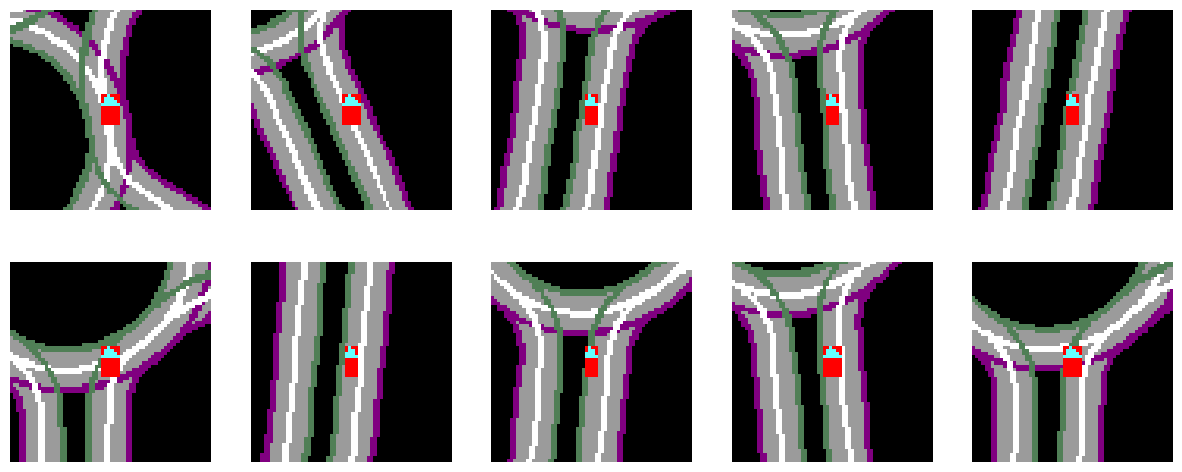

In [16]:
converted_images = [Image.fromarray(img.numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB') for img in obs[:20]]

# Set up a grid for displaying 10 images (e.g., 2 rows x 5 columns)
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Plot each image in the grid
for ax, img in zip(axes.flat, converted_images):
    ax.imshow(img)
    ax.axis('off')  # Turn off axis

plt.show()

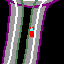

In [17]:
Image.fromarray(obs[2].numpy().astype(np.uint8).transpose(1, 2, 0), 'RGB')

In [18]:
# data/test_eval_data

# with open('../data/test_eval_data/recurrent_state.pkl', 'wb') as f:
#     pickle.dump(recurrent_state[2], f)

In [19]:
# with open('../data/test_eval_data/obs.pkl', 'wb') as f:
#     pickle.dump(obs[2], f)